In [4]:
import os
from kaggle.api.kaggle_api_extended import KaggleApi

# Initialize and authenticate Kaggle API
api = KaggleApi()
api.authenticate()

# Dataset details
dataset = 'vinicius150987/titanic3'
download_path = os.path.expanduser('~/Documents/google_certificate/DA-DS_case_study/titanic_case/')  # Path to Downloads folder

# Create the download directory if it doesn't exist
if not os.path.exists(download_path):
    os.makedirs(download_path)

In [5]:
# Download the dataset
print(f"Downloading dataset {dataset} to {download_path}...")
api.dataset_download_files(dataset, path=download_path, unzip=True)
print("Download completed!")

# List the downloaded files
for root, dirs, files in os.walk(download_path):
    for file in files:
        print(os.path.join(root, file))

Dataset URL: https://www.kaggle.com/datasets/vinicius150987/titanic3
Download completed!
/Users/phoebezou/Documents/google_certificate/DA-DS_case_study/titanic_case/titanic3.xls
/Users/phoebezou/Documents/google_certificate/DA-DS_case_study/titanic_case/kaggle.json
/Users/phoebezou/Documents/google_certificate/DA-DS_case_study/titanic_case/titanic_case.ipynb
/Users/phoebezou/Documents/google_certificate/DA-DS_case_study/titanic_case/.ipynb_checkpoints/titanic_case-checkpoint.ipynb


In [12]:
# data summary
import pandas as pd

def load_housing_data(path = download_path):
    csv_path = os.path.join(download_path, "titanic3.xls")
    return pd.read_excel(csv_path)

titanic = load_housing_data()
titanic.head(10)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
5,1,1,"Anderson, Mr. Harry",male,48.0000,0,0,19952,26.5500,E12,S,3,NaN,"New York, NY"
6,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0000,1,0,13502,77.9583,D7,S,10,NaN,"Hudson, NY"
7,1,0,"Andrews, Mr. Thomas Jr",male,39.0000,0,0,112050,0.0000,A36,S,NaN,NaN,"Belfast, NI"
8,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0000,2,0,11769,51.4792,C101,S,D,NaN,"Bayside, Queens, NY"
9,1,0,"Artagaveytia, Mr. Ramon",male,71.0000,0,0,PC 17609,49.5042,NaN,C,NaN,22.0,"Montevideo, Uruguay"


In [9]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


In [23]:
titanic.isnull().sum()/len(titanic)

pclass       0.000000
survived     0.000000
name         0.000000
sex          0.000000
age          0.200917
sibsp        0.000000
parch        0.000000
ticket       0.000000
fare         0.000764
cabin        0.774637
embarked     0.001528
boat         0.628724
body         0.907563
home.dest    0.430863
dtype: float64

In [17]:
titanic.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


In [22]:
titanic[titanic["fare"] >= 500]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
49,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C,3,NaN,"Austria-Hungary / Germantown, Philadelphia, PA"
50,1,1,"Cardeza, Mrs. James Warburton Martinez (Charlo...",female,58.0,0,1,PC 17755,512.3292,B51 B53 B55,C,3,NaN,"Germantown, Philadelphia, PA"
183,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C,3,NaN,NaN
302,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C,3,NaN,NaN


In [180]:
titanic_dropped = titanic.drop(["name", "ticket", "cabin", "embarked", "boat", "body", "home.dest"], axis = 1)
titanic_dropped = titanic_dropped.dropna(subset = ["fare"])

In [181]:
titanic_dropped.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1308 entries, 0 to 1308
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    1308 non-null   int64  
 1   survived  1308 non-null   int64  
 2   sex       1308 non-null   object 
 3   age       1045 non-null   float64
 4   sibsp     1308 non-null   int64  
 5   parch     1308 non-null   int64  
 6   fare      1308 non-null   float64
dtypes: float64(2), int64(4), object(1)
memory usage: 81.8+ KB


In [33]:
titanic_dropped["pclass"] = titanic_dropped["pclass"].astype(str)

In [44]:
titanic_cat = titanic_dropped[["pclass", "sex"]]
titanic_num = titanic_dropped.drop(titanic_cat, axis = 1)

In [65]:
import matplotlib.pyplot as plt

In [66]:
# from pandas.plotting import scatter_matrix
# scatter_matrix(corr)
# plt.show()

In [49]:
import seaborn as sns

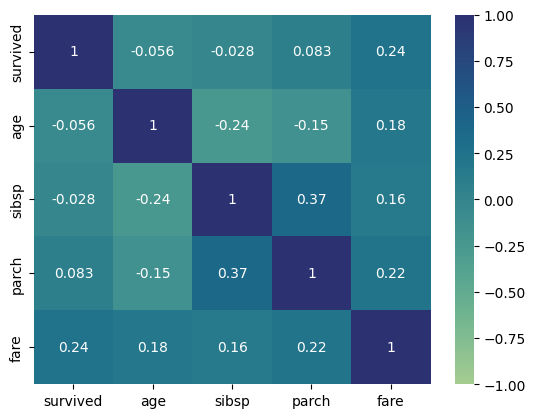

In [54]:
sns.heatmap(
    corr, 
    annot = True,
    vmin = -1,
    vmax = 1,
    cmap = "crest"
)
plt.show()

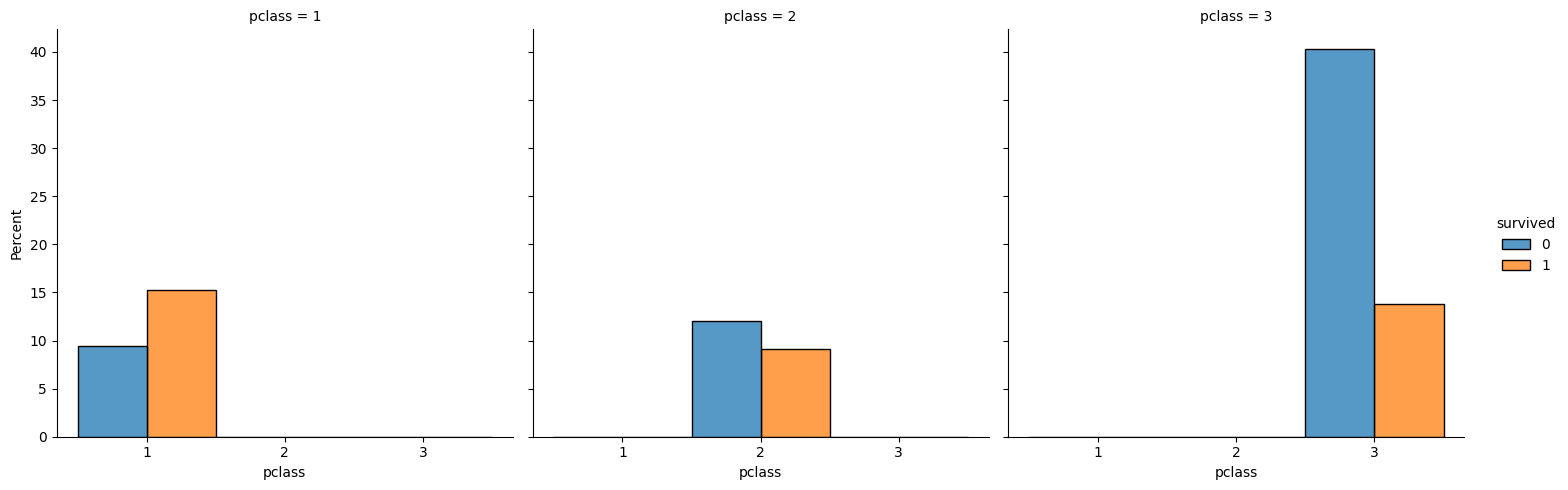

In [118]:
sns.displot(
    titanic_dropped,
    x = "pclass",
    hue = "survived",
    multiple = "dodge",
    stat = "percent",
    col = "pclass"
)
plt.show()

In [99]:
titanic_dropped["survived"].value_counts()

survived
0    809
1    500
Name: count, dtype: int64

In [94]:
titanic_dropped["pclass"].value_counts(sort = True)

pclass
3    709
1    323
2    277
Name: count, dtype: int64

#### Survived rate by class

In [124]:
sum((titanic_dropped["survived"] == 1) & (titanic_dropped["pclass"] == "1")) / sum((titanic_dropped["pclass"] == "1")) # class 1

0.6191950464396285

In [125]:
sum((titanic_dropped["survived"] == 1) & (titanic_dropped["pclass"] == "2")) / sum((titanic_dropped["pclass"] == "2")) # class 2

0.4296028880866426

In [126]:
sum((titanic_dropped["survived"] == 1) & (titanic_dropped["pclass"] == "3")) / sum((titanic_dropped["pclass"] == "3")) # class 3

0.2552891396332863

#### Survived by gender

In [152]:
titanic_dropped["sex"].value_counts()

sex
male      843
female    466
Name: count, dtype: int64

In [145]:
# gender survived rate: survived female in all female
titanic_dropped[["sex", "survived"]].value_counts() / titanic_dropped["sex"].value_counts()

sex     survived
male    0           0.809015
female  1           0.727468
male    1           0.190985
female  0           0.272532
Name: count, dtype: float64

In [156]:
# gender survived rate: survived female in all survived people
titanic_dropped[["sex", "survived"]].value_counts() / titanic_dropped["survived"].value_counts()

sex     survived
male    0           0.843016
female  1           0.678000
male    1           0.322000
female  0           0.156984
Name: count, dtype: float64

#### Survived by gender in different class

In [182]:
(titanic_dropped[["survived", "pclass", "sex"]].value_counts() / titanic_dropped[["survived", "pclass"]].value_counts()).reset_index().sort_values(["pclass", "count"], ascending = False)

,survived,pclass,sex,count
4,0,3,male,0.791271
10,1,3,female,0.585635
11,1,3,male,0.414365
5,0,3,female,0.208729
2,0,2,male,0.924051
8,1,2,female,0.789916
9,1,2,male,0.210084
3,0,2,female,0.075949
0,0,1,male,0.959350
6,1,1,female,0.695000


#### Survived by parents and siblings

In [185]:
# this is the total survival and death
titanic_dropped[["sibsp", "parch", "survived"]].groupby("survived").sum()

,sibsp,parch
survived,,
0,422,266
1,231,238


In [199]:
# survival with no siblings
titanic_dropped[titanic_dropped["sibsp"] == 0][["sibsp", "survived"]].groupby("survived").count() / titanic_dropped[titanic_dropped["sibsp"] == 0]["survived"].count()

,sibsp
survived,
0,0.652809
1,0.347191


In [200]:
# survival with no parents
titanic_dropped[titanic_dropped["parch"] == 0][["parch", "survived"]].groupby("survived").count() / titanic_dropped[titanic_dropped["parch"] == 0]["survived"].count()

,parch
survived,
0,0.664336
1,0.335664


In [201]:
# survival without both parents and siblings
titanic_dropped[(titanic_dropped["parch"] == 0) & (titanic_dropped["sibsp"] == 0)][["sibsp", "parch", "survived"]].groupby("survived").count() / titanic_dropped[(titanic_dropped["parch"] == 0) & (titanic_dropped["sibsp"] == 0)]["survived"].count()

,sibsp,parch
survived,,
0,0.697085,0.697085
1,0.302915,0.302915


#### Survived by age

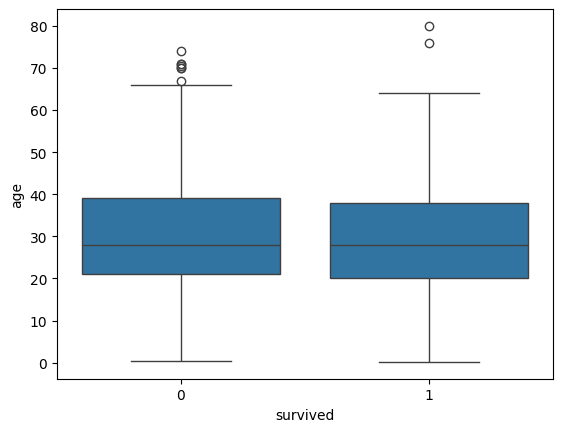

In [207]:
# in general by age
sns.boxplot(data=titanic_dropped, x = "survived", y = "age")
plt.show()

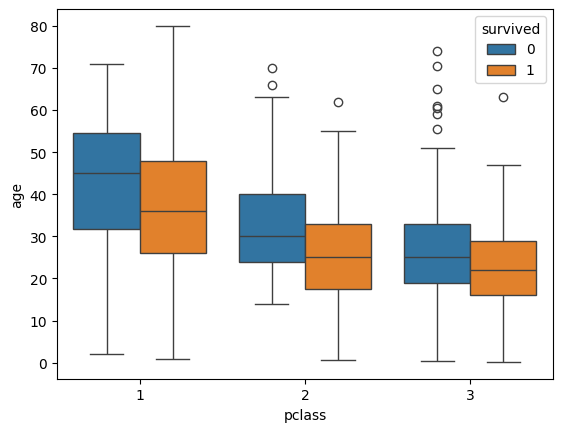

In [208]:
# age in different class
sns.boxplot(data=titanic, x="pclass", y="age", hue="survived")
plt.show()

In [215]:
sns.histplot(data=titanic, x="age", hue="parch", element = "poly", col = "survived")
plt.show()

AttributeError: PolyCollection.set() got an unexpected keyword argument 'col'